#**활동내용**

###**케글 대회 소개**

타이타닉 생존자 분석
[주소] - https://www.kaggle.com/competitions/titanic

타이타닉 생존자 예측

데이터: 타이타닉 탑증자의 여러 정보(예:나이, 성별, 탑승장소 등등)

목적: 미리 제공된 약 800명의 데이터를 가지고 모델을 학습시켜 테스트 인원들의 생존여부 분석. 생존여부를 정확하게 예측한 정도 즉 정확도를 점차 높이는것이 궁극적인 목적이다.

###**진행평가요소**

>1. 데이터 전처리 방법
>2. 모델 선정방법 및 이유

###**피드백**
개인피드백
> 결측치와 각 열중에서 필요한것과 필요하지 않은 것들을 구분하여 상관관계 분석하고 어떤 것을 쓰고 쓰지 않을지 결정하여야한다.

###**깃허브**
> 대다수의 스터디 인원들이 깃허브 사용경험이 적어 이번 모각소 스터디를 계기로 깃허브 레포짓 및 블로그 작성하는 연습을 시행하였습니다. 이후 사용에 익숙해지면 깃허브 팀 레포짓을 만들어 팀단위로 대회에 나가는 증 해볼 계획입니다.

#**활동사진**
2시 활동사진

![2시 활동사진](/images/2023-01-13-MGS1/2시 활동사진-1673591971027-1.png)

3시 활동사진

![3시 활동사진](/images/2023-01-13-MGS1/3시 활동사진.png)

4시 활동사진

![4시 활동사진](/images/2023-01-13-MGS1/4시 활동사진.png)

5시 종료사진

#**개인활동내역**

###**개인 활동 블로그 url**
*전장훈: https://jhwannabe.tistory.com/25

*신재현: https://hectorsin.github.io/categories/#mgs

*곽세현: https://rhkrtpgus.github.io

*강성현: https://seong-hyeon-2.github.io

*김수진: https://sujin7822.github.io/

###**개인 깃 TIL**
*전장훈: https://github.com/JHWannabe/TIL

*신재현: https://github.com/HectorSin/TIL

*곽세현: https://github.com/rhkrtpgus/TIL

*강성현: https://github.com/seong-hyeon-2/TIL

*김수진: https://github.com/sujin7822/TIL

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping




import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

###* pandas 사용 이유 
>##### - 데이터 분석에 특화된 자료구조를 제공하는 라이브러리 인데 스트레드시트 구조로 데이터를 다룰 수 있어서 가장 직관적이다.

###* numpy 사용 이유
>##### - 데이터의 대부분은 숫자 배열로 볼 수 있다. numpy는 비교적 빠른 연산을 지원하고 메모리를 효율적으로 사용한다

###* matplotlib 사용 이유 (vs. seaborn)
>##### - 막대그래프
>##### - 선 그래프
>##### - 산점도
>##### - ETC 등의 시각화를 진행하기에 용이하다


### **1. 데이터 불러오기**

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/All-in/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/All-in/test.csv') 

# 데이터 요약
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 마지막 데이터
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### **2. 데이터 살펴보기**
##### * 데이터의 형태와 크기를 알아보고 결측치를 파악하여 어떠한 형태로 가공할 것인지 방향을 정한다.

>### **2.1 데이터 딕셔너리**
>> ##### survival = 생존여부 (0=no, 1=yes)
>> ##### pclass = 사회, 경제적 지위 (1=1st, 2=2st, 3=3st)
>> ##### sex = 성별
>> ##### age = 나이
>> ##### sibsp = 타이타닉호에 탑승한 형제, 자매 수
>> ##### parch = 타이타닉호에 탑승한 부모, 자녀 수
>> ##### ticket =  티켓 번호
>> ##### fare = 탑승 요금
>> ##### cabin = 탑승 요금
>> ##### embarked = 탑승 지역(항구 위치)

>### **2.2 결측치 파악**
>>##### 데이터의 형태 알아보기기

In [7]:
train_df.shape

(891, 12)

In [8]:
test_df.shape 
# 테스트 데이터는 훈련 데이터로 학습 시킨 모델을 통해 라벨링 해야하므로 survived 열이 빠져서 11개 인것

(418, 11)

In [9]:
# train 데이터의 정보 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# test 데이터의 정보
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# train 데이터셋 설명
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>##### * 훈련 자료의 샘플 수: 891
>##### * 훈련 자료 생존 내 생존율: 38.4%

In [12]:
# null의 갯수 세어보기
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

>>##### null 값이 있으면 모델이 안돌아간다. 정확한 갯수를 세는 이유는 결측치를 없애기 위함이고, 결측치가 너무 많으면 어떤것으로 대체해야하는지 알기 위해서

>>##### 반 이상이 결측치다 -> 평균값으로 대체하는거보다 결측치로 대체
>>##### 소규모 -> 평균값으로 대체하거나 데이터에 특성에 따라서 처리한다

>### **2.3 데이터 시각화**
>> 열들을 시각화 하여 대략적인 분포를 파악하고, 생존과의 상관관계를 유추한다. 명목형, 이산형 데이터에 대해 막대 그래프를 그려준다. 

In [14]:
def bar_chart(feature):
  # 각 column(=feature)에서 생존자의 수 count
  survived = train_df[train_df['Survived']==1][feature].value_counts()

  # 각 column(=feature)에서 사망자의 수 count
  dead = train_df[train_df['Survived']==0][feature].value_counts()

  # 생존자의 수, 사망자의 수를 하나로 묶기
  df= pd.DataFrame([survived,dead])

  # 묶은 dataframe의 인덱스명(행이름) 지정
  df.index=['Survived','Dead']

  # plot 그리기
  df.plot(kind='bar', stacked=True, figsize=(10,5))

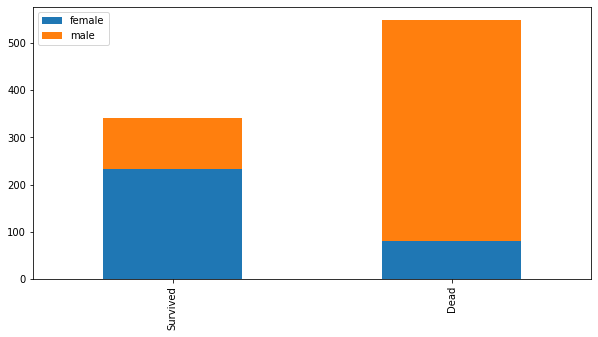

In [15]:
# 성별 차트
bar_chart('Sex') # 남성이 여성에 비해 더 많이 사망한 것을 알 수 있다

In [16]:
# 훈련 데이터의 Sex별 생존자 수치 분석
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 다른 팀원분이 한거 보니까 Sex 부분에 female, male 부분이 적혀져서 나오던데, 이건 어떻게 하는건지...!

,Sex,Survived
0,female,0.742038
1,male,0.188908


##### * as_index = False: 구문은 이 그룹을 인덱스로 지정할 것인지 여부인데, 인덱스로 지정하면 그룹이 표의 형태로 들어간다
##### -> 위처럼 표로 나타내어지는 이유가 as_index = False 때문이다

##### * ascending = False : 내림차순 정렬을 의미한다
##### * 이 외의 정렬에는
>##### 1) Row index 기준정렬
>##### : Series 객체 index 순으로 정렬한다
>##### s1.sort_index()
>##### : DataFrame 객제 index 순으로 결정
>##### df2.sort_index()

>##### 2) Column index 기준정렬
>##### : DataFrame 객체 column 순으로 정렬하여 axis를 지정해야한다.
>##### df2.sort_index(axis=1)

>##### 3) 객체를 값에 따라 정렬한다
>##### : 객체를 값에 따라 정렬할 경우에는 sort_values 메스드를 이용하고, 기본적으로 오름차순으로 정렬된다


##### male, female로 돼있던 데이터를 numberic하게 바꾸어주기

In [17]:
train_df['Sex_clean'] = train_df['Sex'].astype('category').cat.codes
test_df['Sex_clean'] = test_df['Sex'].astype('category').cat.codes

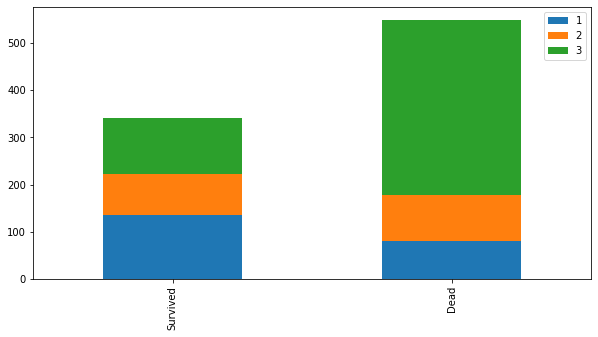

In [18]:
# 사회, 경제적 지위별 차트
bar_chart('Pclass') # 3st에 해당하는 사람들이 훨씬 더 많이 죽은 것을 확인 할 수 있다

In [19]:
# 훈련 데이터의 Pclass별 생존자 수치 분석
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived' )

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


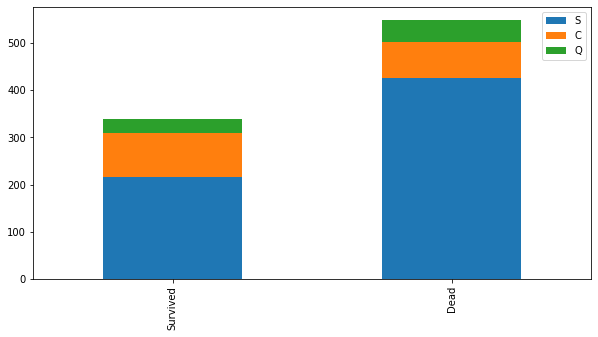

In [20]:
# 탑승지역(항구위치)별 차트
bar_chart('Embarked') # Southampton에서 탑승한 사람들이 훨씬 더 많이 생존하고, 사망한 것을 알 수 있다

Embarked 
##### train 부분에 NaN 값이 2개가 있고, 이를 처리를 안해주면 나중에 오류가 날 수 있기 때문에, 최빈값인 S로 일괄 채워줘야 합니다.

##### 또한, Embarked 칼럽 역시 numberic한 데이터로 변경해서 'Embarked_clean' 칼럼에 채워줘야 합니다.

In [21]:
train_df['Embarked'].isnull().sum()
test_df['Embarked'].isnull().sum()

train_df['Embarked'].value_counts()

train_df['Embarked'].fillna('S', inplace=True)

train_df['Embarked_clean']= train_df['Embarked'].astype('category').cat.codes
test_df['Embarked_clean']= test_df['Embarked'].astype('category').cat.codes

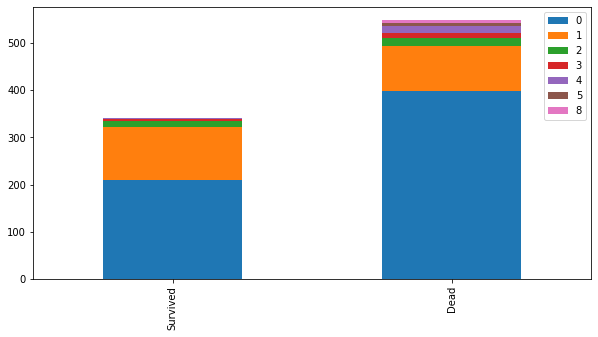

In [22]:
# 타이타닉호에 탑승한 형제자매 수 별 차트
bar_chart('SibSp') # 0명인 사람이 많이 죽기도 하였지만, 상대적으로 많이 생존한 것을 알 수 있다

>##### 남성보단 여성이 많이 생존하였고, 1등급 승객, 가족이 있는 승객의 생존율이 더욱 높은 것을 알 수 있다. 탑승지역에서는 S 승객들이 많이 사망한 것으로 보인다

In [23]:
#train 데이터의 SipSp 별 생존자 수치 분석
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived' )

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


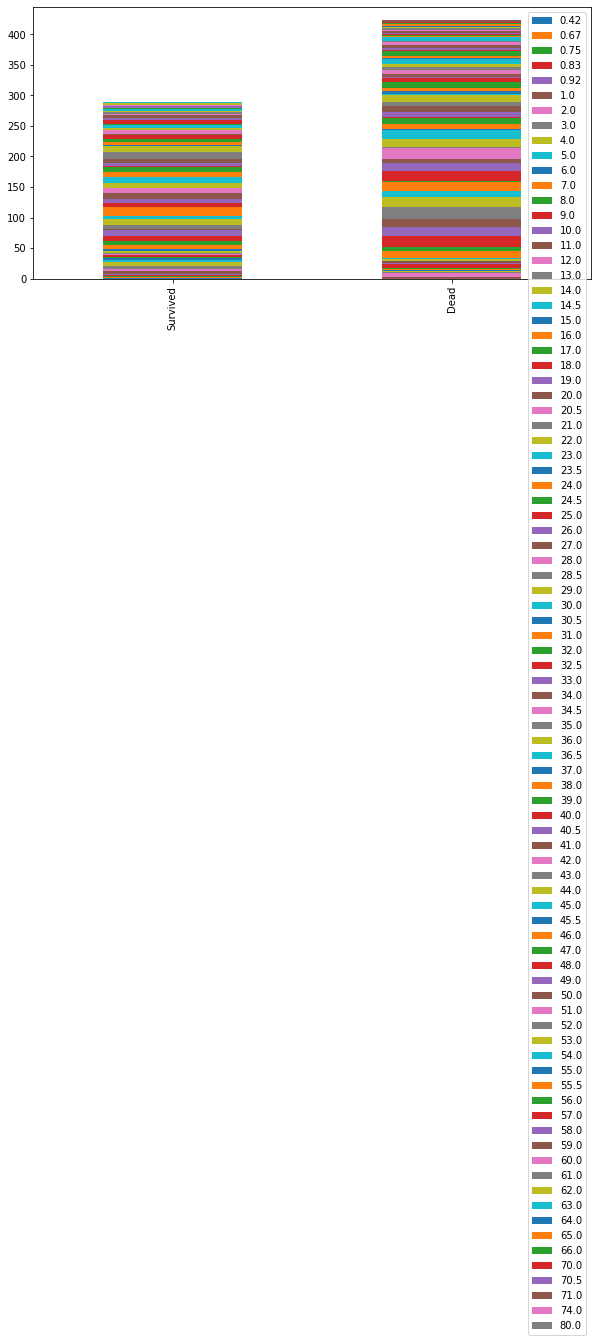

In [24]:
# Age(나이) 
bar_chart('Age')

# 범위를 지정해서 소트 시키기 -> 학습진행

>##### 돌려보고 이렇게 구하는게 아님을 알았다..
>##### 다양한 분포가 존재하니 막대 그래프 말고 점으로 표시된 그래프로 나타내보기로 했다

In [25]:
#train_df['Age'].isnull().sum()
#test_df['Age'].isnull().sum()

#train_df['Age'].fillna(train_df.groupby)

In [26]:
#train_df['Age']= pd.qcut(train_df['Age'],5)
#test_df['Age']= pd.qcut(test_df['Age'],5)

#train_df['Age'].value_counts()

>### 산점도(Scattor Plot) 
>##### matplotlib.pyplot 모듈의 scatter() 함수를 이용하면 산점도를 그릴 수 있다

In [27]:
#plt.scatter(df['Age'])
#plt.show()

In [28]:
def bar_chart(feature):
  survived = train_df[train_df['Survived']==1][feature].value_counts()
  dead = train_df[train_df['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Surevived', 'Dead']
  df.plot(kind = 'bar', stacked = True, figsize = (10,5))

  # 입력값을 받아들일 때 여러 데이터에 적용할 수 있게 코드를 다시 짜라..
  # train_df 외에 다른 데이터도 바꿀 수 있게 해라

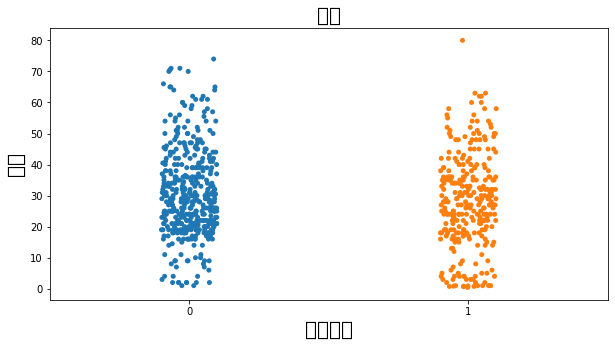

In [29]:
# 이거저거 해보다가 다른 분 것을 봤는데 이것도 괜찮은거 같아서 짜본다..

plt.figure(figsize = (10,5))
plt.title('나이',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Age', data = train_df, jitter = True)
plt.xlabel('생존여부', fontsize = 20)
plt.ylabel('나이', fontsize = 20)


plt.show()

#0: 사망, 1: 생존

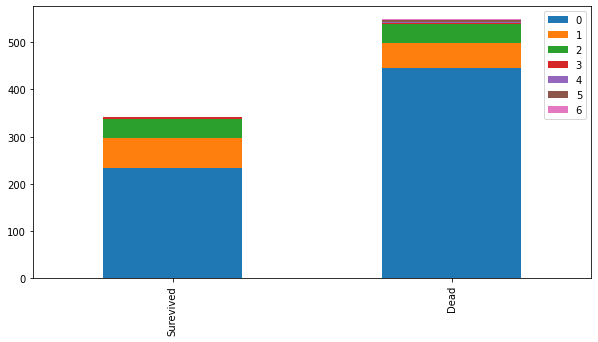

In [30]:
# Parch(함께 탑승한 부모, 자식의 수)
bar_chart('Parch')

In [31]:
# Parch 별 생존자 수치 분석
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived')

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


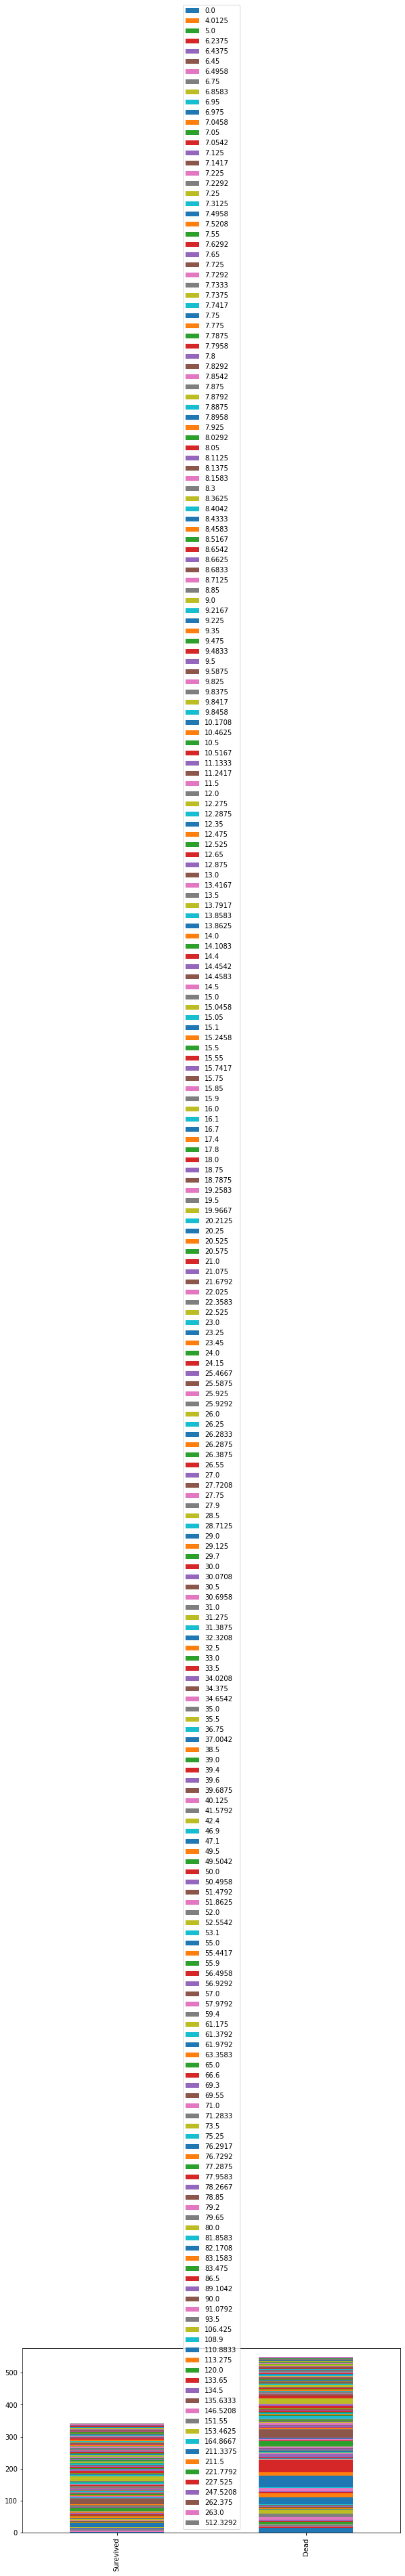

In [32]:
# Fare(티켓 요금)
bar_chart('Fare')

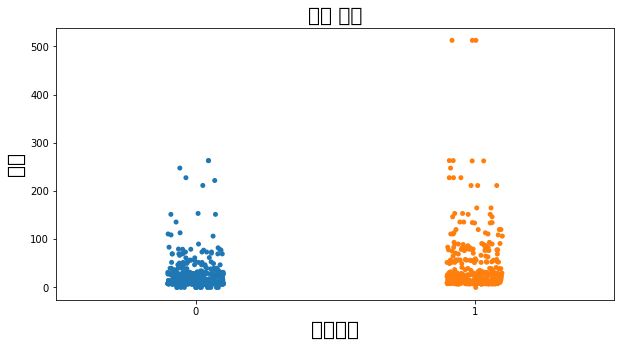

In [33]:
plt.figure(figsize = (10,5))
plt.title('티켓 요금',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Fare', data = train_df, jitter = True)
plt.xlabel('생존여부', fontsize = 20)
plt.ylabel('요금', fontsize = 20)


plt.show()

#0: 사망, 1: 생존

>##### 싸게 티켓을 주고 살아남은 사람들이 많지만, 비싼 티켓보다 싼 값의 티켓의 양이 더 많으므로 유의미한 결과를 내진 못했다고 생각한다

# 3. 데이터 전처리
#### https://whitewing4139.tistory.com/178 의 이론을 참고

1) 필요 없는 데이터 제거

##### Ticket과 Cabin의 데이터는 필요없을거라 판단하여 해당 열을 제거한다

In [34]:
combine = [train_df, test_df]

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 14) (418, 13) (891, 14) (418, 13)
After (891, 12) (418, 11) (891, 12) (418, 11)


In [43]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

IntCastingNaNError: ignored

#### 1) 이상치 및 결측치 처리
>##### * pandas.DataFrame.isnull() : 결측치 여부를 T/F값으로 반환해준다. 결측치인 경우 True를 반환한다.
>##### * pandas.DataFrame.notnull() : 결측치 여부를 T/F값으로 반환한다. 실측치인 경우엔 True로 반환한다.
>##### * pandas.DataFrame.dropna(axis): 결측치가 포함된 데이터를 제외하고 추출한다.
>##### * pandas.DataFrame.fillna("대체값") : 결측치 데이터를 "대체값"으로 적용한다.
>>##### - fillna() 메서드의 method인자값을 ["ffill", "pad"] 중 하나로 지정하여, 결측치 앞의 값으로 대체할 수 있다.
>>##### - fillna() 메서드의 method인자값을 ["bfill", "pad"] 중 하나로 지정하여
>##### * numpy.where("조건", "조건 True시 대체값", "조건 False 시 대체값")

>##### * 이상치(Outlier): 수집된 데이터의 모음(데이터 셋) 값 중, 다른 데이터에 비해 매우 크거나 작은 값
>>##### 1. 이상치 데이터의 처리(4)
>>##### - 이상치의 삭제
>>##### - 이상치의 값 대체
>>##### - 데이터 셋의 축소/과장
>>##### - 데이터 셋의 최소최대척도 적용
>>##### - 데이터 셋의 정규화

>##### * 결측치(Missing Value): 데이터 수집 과정에서 측정되지 않거나 누락된 데이터


In [35]:
train_df['Age'] = train_df['Age'].fillna(29)  
# 결측치를 채우기로 결정, 결측치를 대신하여 넣고자 하는 값을 명시 - 최빈값을 넣기로 하였다
train_df['Sex'] = train_df['Sex'].map({'male':0 , 'female':1})

test_df['Age'] = test_df['Age'].fillna(29)
test_df['Fare'] = test_df['Fare'].fillna(32)
test_df['Sex'] = test_df['Sex'].map({'male':0 , 'female':1})

# 나이는 어린애 노인들이 많은데, 특정한 쪽으로 쏠릴 경우가 많다 따라서 나이는 평균값
# 서로 연관이 없는 데이터는 최빈값 -> 데이터 형식에 따라 어떤 식으로 전처리 할지 알아보기

In [37]:
train_df = train_df.drop(['Name'], axis = 1)
train_df = train_df.drop(['Ticket'], axis = 1)

KeyError: ignored

In [38]:
test_df = test_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

KeyError: ignored

In [39]:
train_df_x = train_df[['Pclass', 'SibSp','Age', 'Sex', 'Fare']]
train_df_y = train_df['Survived']

In [40]:
test_df_x = test_df[['Pclass', 'SibSp', 'Age', 'Sex', 'Fare']]

### 2) 표준화 및 정규화
>##### * 정규화: 특성 값의 범위를 [0,1]로 옮긴다
>##### - 식: (X-MIN)/(MAX-MIN)
>>##### # 수식을 통한 정규화
>>##### # sklearn.preprocessing을 통한 정규화
>##### * 표준화: 어떤 특성의 값들이 정규분포를 따른다고 가정하고, 값들을 0의 평균, 1의 표준편차를 갖도록 반환한다
>##### - 식: (X-평균)/표준편차
>>##### # numpy를 이용한 표준화
>>##### # zscore를 이용한 표준화
>>##### # sckit-learn processing을 이용한 표준화

In [41]:
##표준화 : 평균 = 0, 표준편차 = 1
from sklearn.preprocessing import StandardScaler


# StandardScaler객체 생성
scaler = StandardScaler() 
scaler.fit(train_df_x)
train_scaled = scaler.transform(train_df_x)
train_x = train_scaled

scaler.fit(test_df_x)
test_scaled = scaler.transform(test_df_x)
test_df_x = test_scaled

print(test_df_x)

[[ 0.87348191 -0.49947002  0.35544516 -0.75592895 -0.49824896]
 [ 0.87348191  0.61699237  1.34516057  1.32287566 -0.51311611]
 [-0.31581919 -0.49947002  2.53281907 -0.75592895 -0.46493053]
 ...
 [ 0.87348191 -0.49947002  0.67215409 -0.75592895 -0.50863373]
 [ 0.87348191 -0.49947002 -0.08002962 -0.75592895 -0.49429012]
 [ 0.87348191  0.61699237 -0.08002962 -0.75592895 -0.23774919]]


In [42]:
##정규화 : [0,1]

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
  
scaler.fit(train_df_x)
train_scaled = scaler.transform(train_df_x)

train_df_x = train_scaled 

scaler.fit(test_df_x)
test_scaled = scaler.transform(test_df_x)

test_df_x = test_scaled 


print(test_df_x)

[[1.         0.         0.4527232  0.         0.01528158]
 [1.         0.125      0.61756561 1.         0.01366309]
 [0.5        0.         0.8153765  0.         0.01890874]
 ...
 [1.         0.         0.50547277 0.         0.01415106]
 [1.         0.         0.38019254 0.         0.01571255]
 [1.         0.125      0.38019254 0.         0.0436405 ]]


# 4. 모델 정의 및 학습

### 모델은 몇가지 아는게 없고, 어떤 것을 써야할 지 몰라서 다른 분들은 어떤걸 하셨나 찾아보니 의사결정나무, 로지스틱회귀, 랜덤포레스트,LightGBM, 인공신경망 모델들을 사용할 수 있는 것을 알 수 있었습니다.

In [ ]:
# 모델 평균 정확도 구하기
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# kfold 함수

def kfold_func(clf):

  scoring = 'accuracy'
  score = cross_val_score(clf, train_df_x, train_df_y, cv=k_fold, n_jobs=1, scoring=scoring)
  print(score)
  #print('평균 정확도:', round(np.mean(score)*100,2))
  
# 프린트 케이 폴드 펑션.. 써서 값넣기

#### kfold함수에서 설정할 수 있는 argument 목록
>##### * n_splits: 분할한 세트의 개수, 1세트의 test만 데이터로 활용하고 나머지 데이터는 train 데이터로 사용, 5가 기본값으로 주어져 있다.
>##### * shuffle: True로 설정 시 데이터셋 내의 순서를 섞어 셈플링, False 인 경우 순서대로 분할, False가 기본으로 주어져 있다
>##### * random_state: seed 설정, 특정 정수로 지정시 샘플링 결과 고정

In [ ]:
#from sklearn.model_selection import KFold

#X = np.array(df.iloc[:, :-1]) # class 열 제외한 feature 열들 모음 -> array 변환
#y = df['class']

# split 개수, 셔플 여부 및 seed 설정
#kf = KFold(n_splits = 10, shuffle = False, random_state = 0)

# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
#for train_df_index, test_df_index in kf.split(X):
#    train_df_x, test_df_x = X[train_df_index], X[test_df_index]
#    train_df_y, test_df_y = y[train_df_index], y[test_df_index]

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

#accuracy_history = []

#for train_df_index, test_df_index in kf.split(X):
#   train_df_x, test_df_x = X[train_df_index], X[test_df_index]
#    train_df_y, test_df_y = y[train_df_index], y[test_df_index]

#    model = RandomForestClassifier(n_estimators=5, random_state=0) # 모델 선언
#    model.fit(train_df_x, train_df_y) # 모델 학습

#    y_pred = model.predict(test_df_x) # 예측 라벨
#    accuracy_history.append(accuracy_score(y_pred, test_df_y)) # 정확도 측정 및 기록

#print("각 분할의 정확도 기록 :", accuracy_history)
#print("평균 정확도 :", np.mean(accuracy_history))

In [44]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 9))

In [45]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

ValueError: ignored